In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
temp_df = pd.read_csv('./daily_min_temperatures.csv', parse_dates=['Date'])

In [24]:
temp_df

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [25]:
temp_df.dtypes

Date    datetime64[ns]
Temp           float64
dtype: object

In [26]:
temp_df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [27]:
temp_df['Date'] = pd.to_datetime(temp_df['Date'])


temp_df = temp_df.set_index('Date')

temp_df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [28]:
temp_df.describe()

,Temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


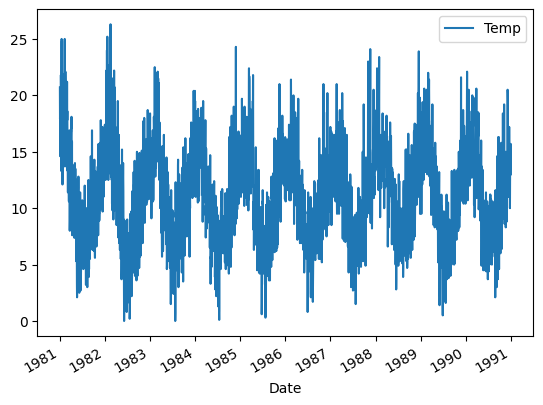

In [29]:
temp_df.plot()
plt.show()

In [30]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

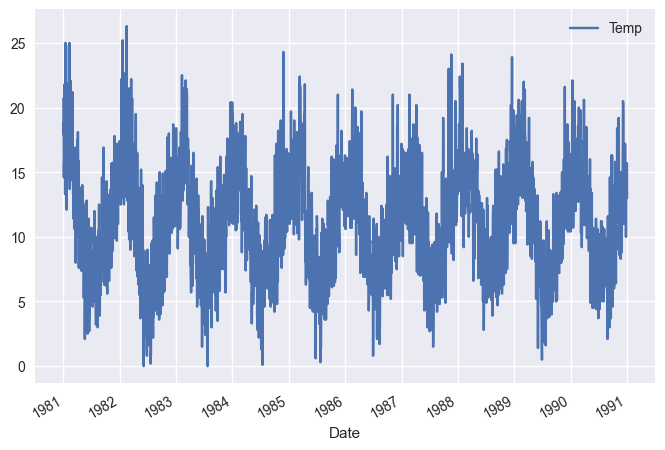

In [31]:
plt.style.use('seaborn-v0_8')

temp_df.plot()
plt.show()

Text(0.5, 1.0, 'Lowest temp')

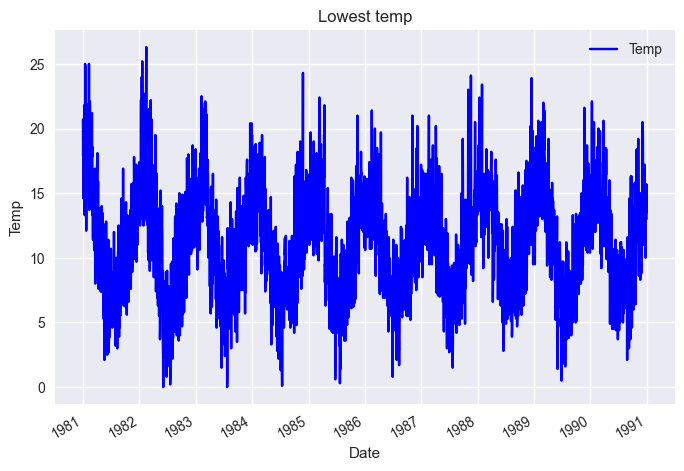

In [32]:
ax = temp_df.plot(color = 'blue')


ax.set_xlabel('Date')
ax.set_ylabel('Temp')
ax.set_title('Lowest temp')

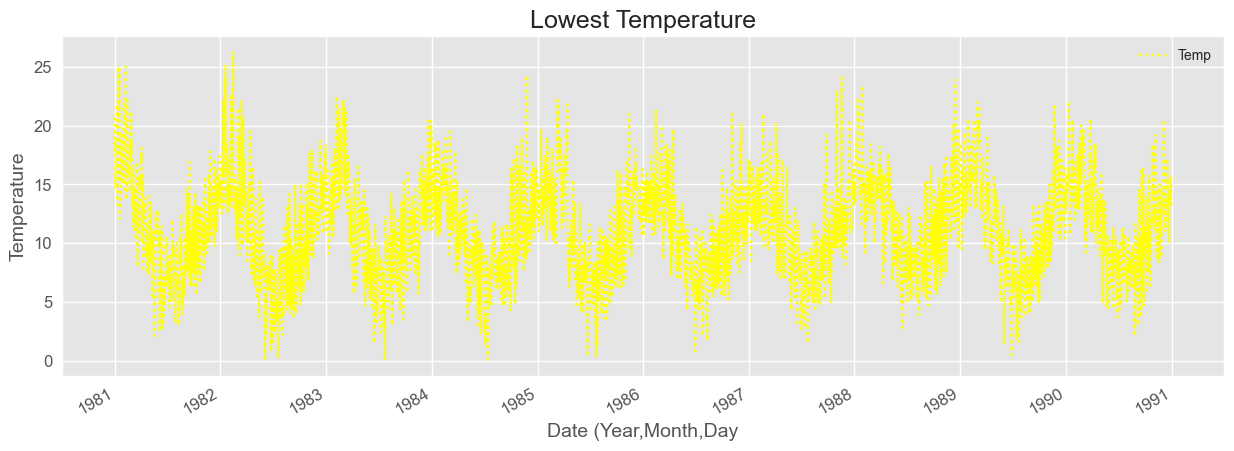

In [33]:
plt.style.use('ggplot')
ax = temp_df.plot(color='yellow' , figsize=(15,5) , fontsize=12, linestyle='dotted')

ax.set_xlabel('Date (Year,Month,Day' , fontsize=14)
ax.set_ylabel('Temperature' ,fontsize = 14  )
ax.set_title('Lowest Temperature' , fontsize =18)
plt.show()

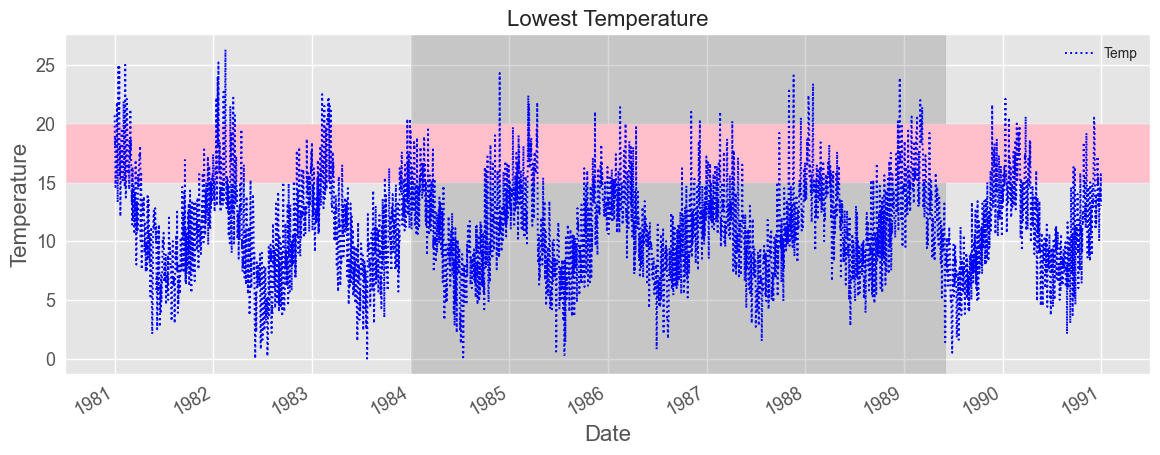

In [34]:
plt.style.use('ggplot')
ax = temp_df.plot(color='blue' , figsize = (14,5) , fontsize = 13 , linewidth = 1.4 , linestyle='dotted')

ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Temperature', fontsize=16)
ax.set_title('Lowest Temperature', fontsize=16)

ax.axvspan('1984-01-01' , '1989-06-01'  , color ='grey' , alpha = 0.3 )

ax.axhspan(15, 20 , color ='pink')

In [35]:
temp_df_2 = temp_df.loc['1985-01-01':'1990-01-01' ,  :]

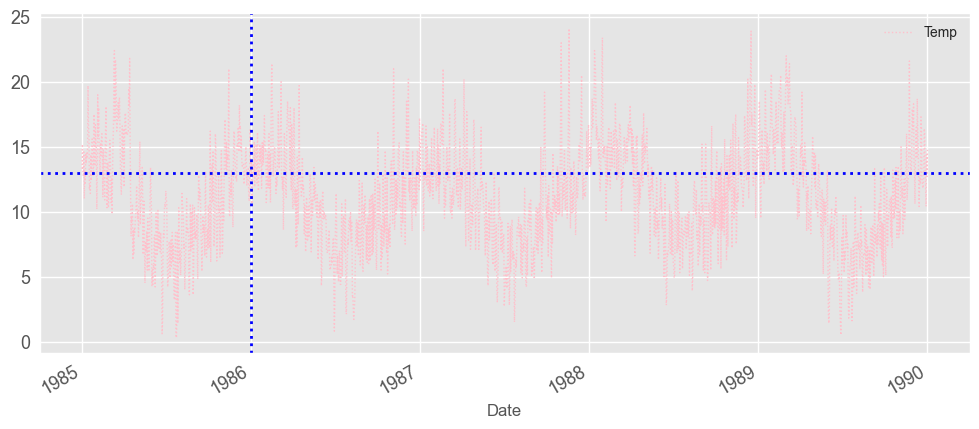

In [36]:
ax = temp_df_2.plot(color='pink', figsize=(12,5) , fontsize = 13, linewidth =1  , linestyle='dotted')


ax.axvline('1986-01-01' , linestyle='dotted' , color ='blue', linewidth  = 2)
ax.axhline(13, linestyle=':' , linewidth = 2 , color  = 'blue')
plt.show()

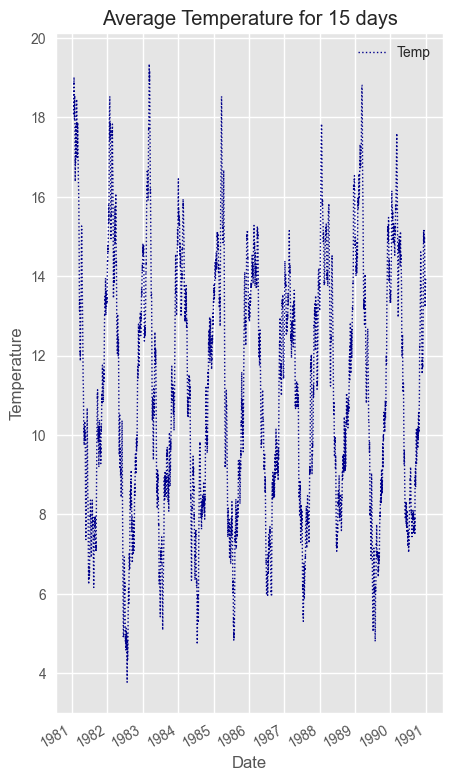

In [37]:
temp_df_rolling =  temp_df.rolling(window = 15).mean()

ax = temp_df_rolling.plot(color='darkblue', figsize=(5, 10), fontsize=10, linewidth=1, linestyle=':')
ax.set_xlabel('Date')
ax.set_ylabel('Temperature')
ax.set_title('Average Temperature for 15 days')
plt.show()

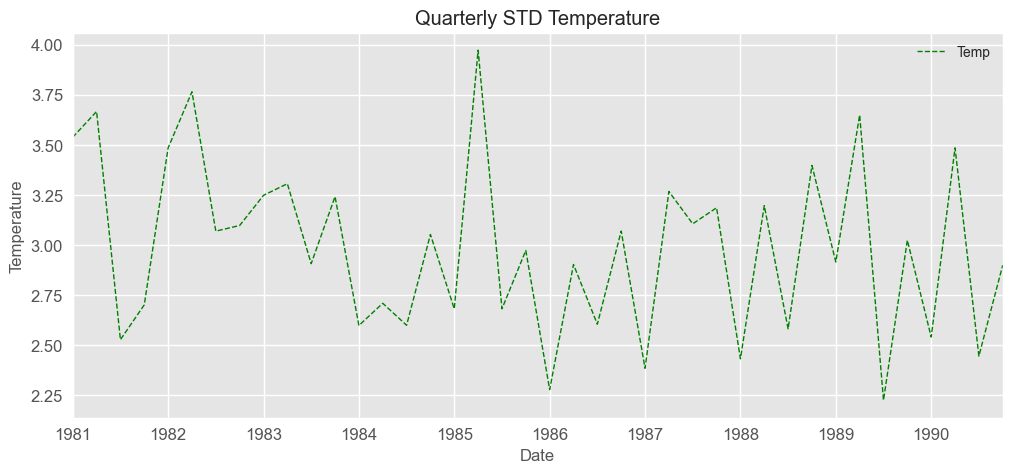

In [38]:
ax = temp_df.resample('QE').std().plot(color='green', figsize=(12,5), fontsize=12, linewidth=1, linestyle='--')
ax.set_xlabel('Date')
ax.set_ylabel('Temperature')
ax.set_title('Quarterly STD Temperature')
plt.show()

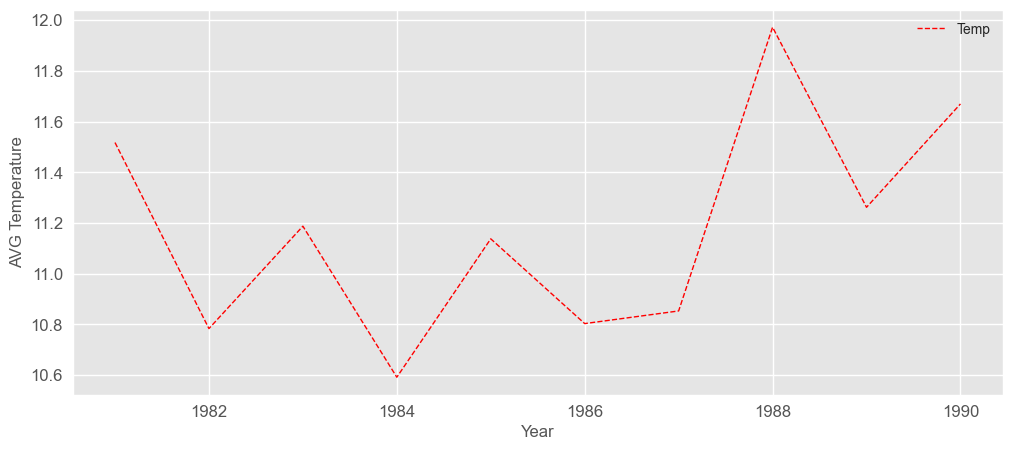

In [39]:
index_year = temp_df.index.year
ax = temp_df.groupby(index_year).mean().plot(color='red', figsize=(12,5), fontsize=12, linewidth=1, linestyle='--')
ax.set_xlabel('Year')
ax.set_ylabel('AVG Temperature')
plt.show()

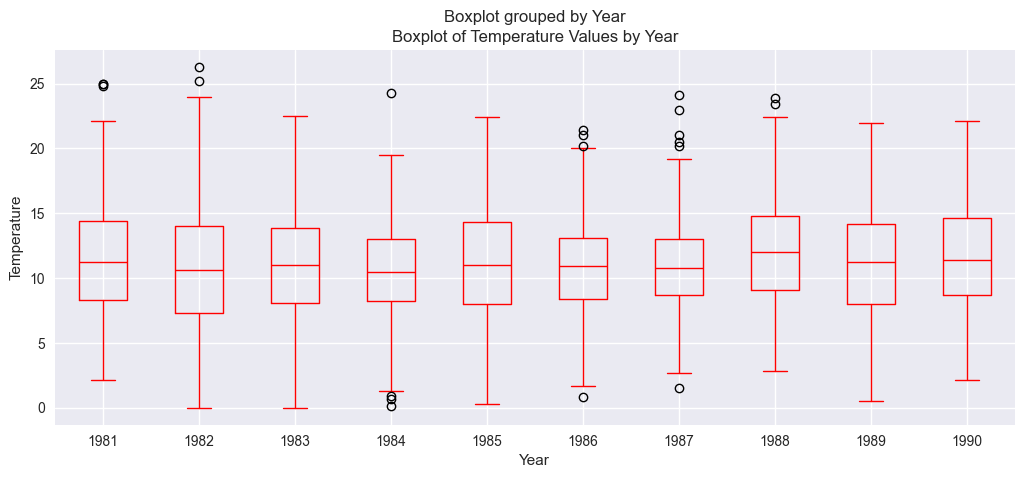

In [40]:

plt.style.use('seaborn-v0_8')
index_year = temp_df.index.year
temp_df['Year'] = index_year
ax = temp_df.boxplot(by='Year', figsize=(12,5), color='red')

ax.set_xlabel('Year')
ax.set_ylabel('Temperature')
ax.set_title('Boxplot of Temperature Values by Year')
plt.show()

# Remove the Month column
temp_df = temp_df.drop('Year', axis=1)

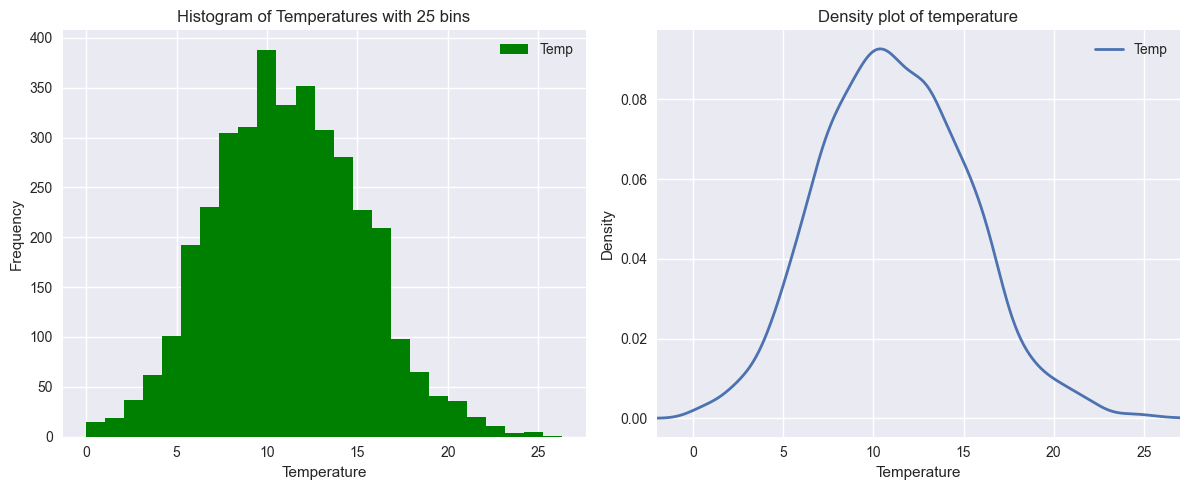

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

# Plot histogram
temp_df.plot(kind='hist', bins=25, title='Histogram of Temperatures with 25 bins', ax=ax[0], color='green')
ax[0].set_xlabel('Temperature')

# Plot density plot
temp_df.plot(kind='density', linewidth=2, ax=ax[1], title='Density plot of temperature', xlim=(-2,27))
ax[1].set_xlabel('Temperature')

plt.tight_layout()
plt.show()

In [42]:
temp_df

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


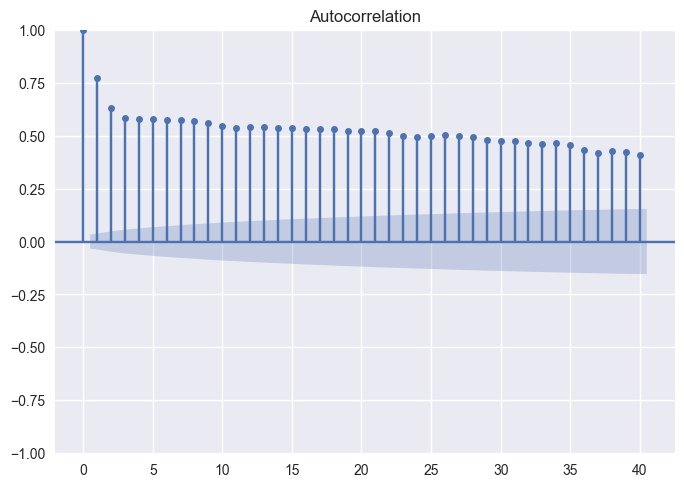

In [43]:
from statsmodels.graphics import tsaplots
fig = tsaplots.plot_acf(temp_df, lags=40)

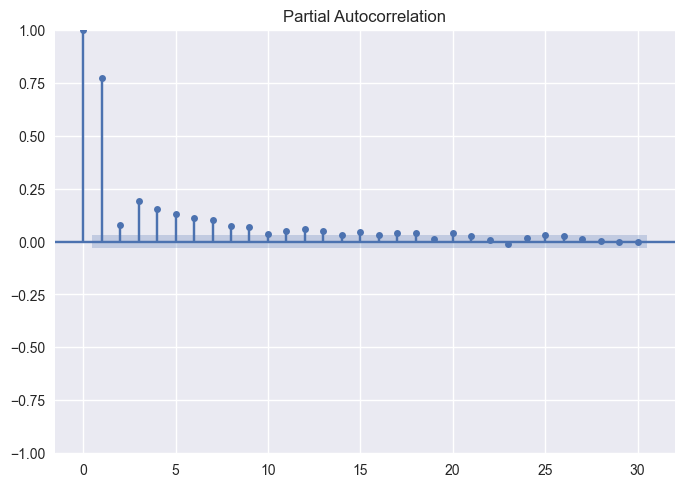

In [44]:
from statsmodels.graphics import tsaplots
fig = tsaplots.plot_pacf(temp_df, lags=30)

In [45]:
# Load the Air Passengers dataset
df = pd.read_csv('./airline-passengers.csv')

# Convert the 'Month' column to datetime format
df['Month'] = pd.to_datetime(df['Month'])

# Set 'Month' column as the index
df.set_index('Month', inplace=True)

# Display the first few rows of the dataset
print(df.head())


            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


In [46]:
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


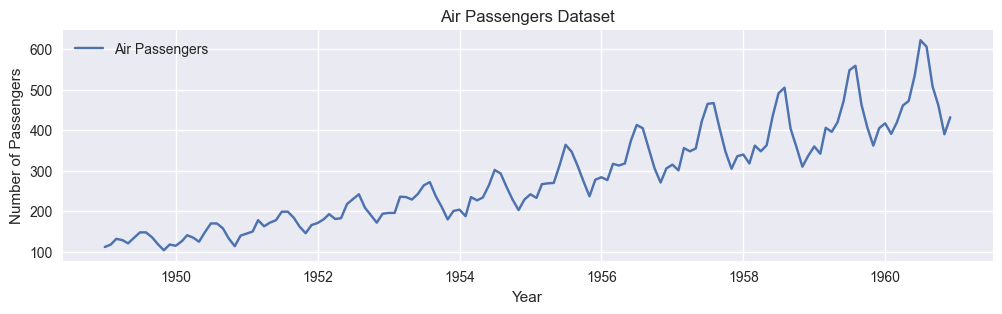

In [47]:

# Plotting the dataset to visualize trend and seasonality
plt.figure(figsize=(12, 3))
plt.plot(df.index, df['Passengers'], label='Air Passengers')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('Air Passengers Dataset')
plt.legend()
plt.grid(True)
plt.show()

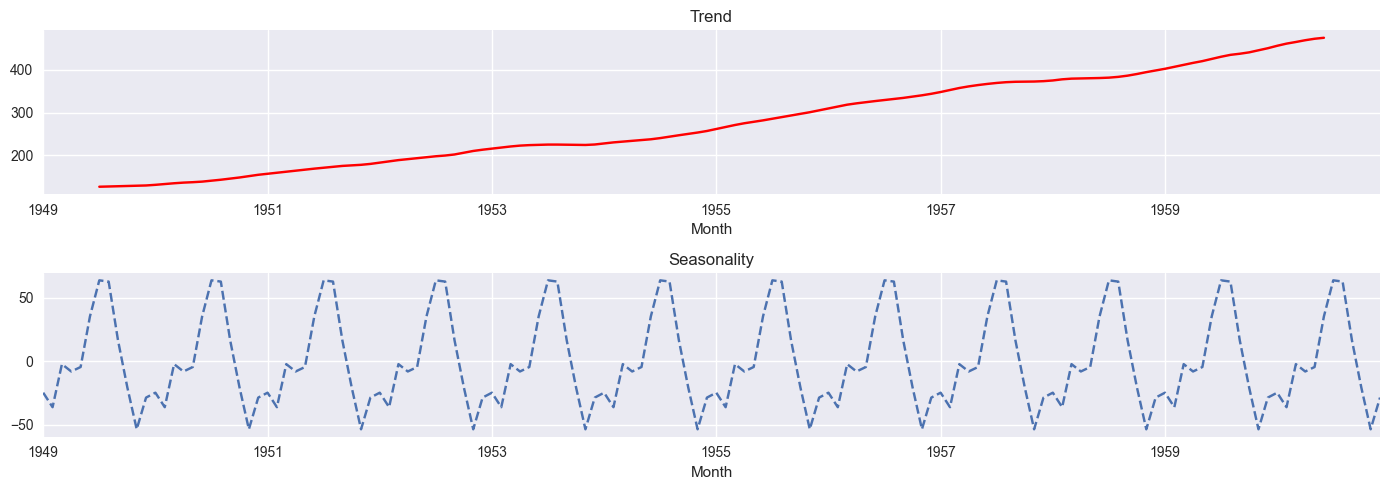

In [48]:
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(df)
trend = decomposition.trend
seasonal = decomposition.seasonal

fig, ax = plt.subplots(2,1, figsize=(14,5))

trend.plot(title='Trend' , ax = ax[0] , color ='red')

seasonal.plot(title='Seasonality' , ax = ax[1], linestyle='--')
plt.tight_layout()
plt.show()

In [49]:
data = pd.read_csv('opsd_germany_daily.csv', parse_dates=['Date'])
data = data.set_index('Date')
data = data.resample('ME').mean()
data = data.dropna()
data.head()



,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2012-01-31,1351.441226,227.122419,17.346452,244.468871
2012-02-29,1426.666241,157.806345,36.093724,193.900069
2012-03-31,1294.748258,129.952387,75.706355,205.658742
2012-04-30,1264.427000,113.164300,89.109933,202.274233
2012-05-31,1239.388710,93.269032,133.747742,227.016774


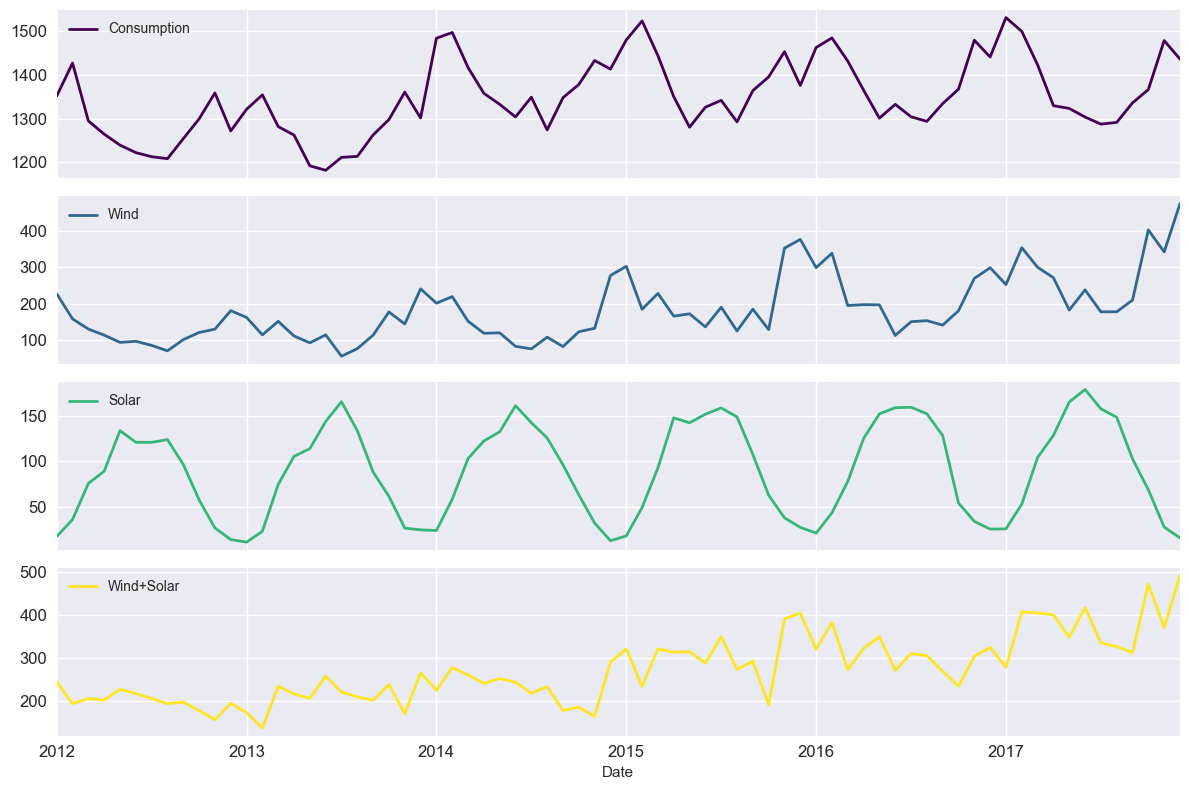

In [50]:
ax = data.plot(figsize=(12,8), subplots=True,  sharey=False, sharex=True, colormap='viridis', fontsize=12, linewidth=2)

plt.tight_layout()
plt.show()

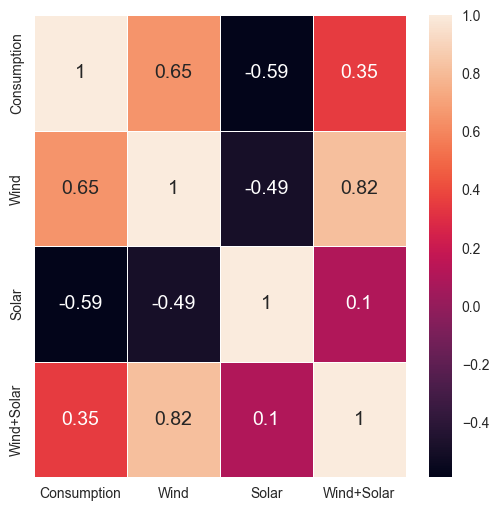

In [51]:
import  seaborn as sns


corr_mat = data.corr(method='pearson')

plt.figure(figsize=(6,6))

sns.heatmap(corr_mat , annot=True, linewidths=  0.6 , annot_kws={'size':14})
plt.show()